<div class="alert alert-block alert-info">
<center> <h1> BUSINESS CASE 3 - BUSINESS CASES FOR DATA SCIENCE </h1> </center> <br>
<center> MDSAA 2021/2022 </center>

<a class="anchor" id="import">

## 1. Import

</a>

<a class="anchor" id="importlibraries">

__`1.1. Import Libraries`__ 
    
</a>

In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [47]:
#! pip install mlxtend  

You should consider upgrading via the 'C:\Users\Administrador\anaconda3\python.exe -m pip install --upgrade pip' command.


<a class="anchor" id="importdataset">

__`1.2. Import Dataset`__ 
    
</a>

In [3]:
transactions = pd.read_csv('retail.csv')

transactions.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
transactions[transactions['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


**Metadata** <br>
- *InvoiceNo* - Unique identifier of each invoice. If it starts with c, it means a cancellation.
- *StockCode* - Unique identifier of each distinct item.
- *Description* - Item name.
- *Quantity* - Quantity of each time in the transaction.
- *InvoiceDate* - Date and time of the transaction.
- *UnitPrice* - Item price per unit in pounds.
- *CustomerID* - Unique identifier of each customer. 
- *Country* - Country of residence of each customer.

<a class="anchor" id="dataexploration">

## 2. Data Exploration

</a>

<a class="anchor" id="descriptivestatistics">

__`2.1. Descriptive Statistics`__ 
    
</a>

In [62]:
transactions.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,541909,25900,573585,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,9.55225,218.081158,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,541909,23260,10/31/2011 14:41,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,541909.0,NaN,NaN,NaN,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,1713.600303,12346.0,13953.0,15152.0,16791.0,18287.0
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a class="anchor" id="checkdupandmv">

__`2.2. Check Duplicates and Missing Values`__ 
    
</a>

In [66]:
transactions[transactions.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [67]:
transactions.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [68]:
transactions[transactions['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


<a class="anchor" id="checkdatatypes">

__`2.3. Check Data Types`__ 
    
</a>

In [72]:
transactions.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [21]:
transactions.CustomerID = transactions.CustomerID.astype('object') 

<a class="anchor" id="coherencecheck">

__`2.4. Coherence Checking`__ 
    
</a>

In [74]:
transactions.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,541909,25900,573585,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,9.55225,218.081158,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,541909,23260,10/31/2011 14:41,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,541909.0,NaN,NaN,NaN,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,4372.0,17841.0,7983.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Transactions with zero or negative values of quantity
transactions[transactions['Quantity'] < 0]  #-> transform 10624
transactions['Quantity'] = abs(transactions['Quantity'])

# Transactions with zero quantity
transactions[transactions['Quantity'] == 0]  #-> 0

# Transactions with zero or negative values of price
transactions[transactions['UnitPrice'] <= 0]  #-> remove 2517
transactions = transactions[transactions['UnitPrice'] > 0]

# Remove adjustments of bad debt (StockCode = B)
transactions = transactions[transactions['StockCode'] != 'B']

# Remove discounts (StockCode = D)
transactions = transactions[transactions['StockCode'] != 'D']

# Remove manual transactions (StockCode = M and m)
transactions = transactions[transactions['StockCode'] != 'M']
transactions = transactions[transactions['StockCode'] != 'm']

# Remove samples transactions (StockCode = S)
transactions = transactions[transactions['StockCode'] != 'S']

# Remove postages (StockCode = POST)
transactions = transactions[transactions['StockCode'] != 'POST']

# Remove dot postages (StockCode = DOT)
transactions = transactions[transactions['StockCode'] != 'DOT']

#FINAL - 536726 rows

In [5]:
transactions.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,536726,23284,573585,1113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,536726,3931,85123A,2307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,536726,4036,WHITE HANGING HEART T-LIGHT HOLDER,2365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,536726.0,NaN,NaN,NaN,10.898293,215.859228,1.0,1.0,3.0,10.0,80995.0
InvoiceDate,536726,21371,10/31/2011 14:41,1113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,536726.0,NaN,NaN,NaN,3.789676,68.898411,0.001,1.25,2.08,4.13,17836.46
CustomerID,405041.0,4362.0,17841.0,7971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,536726,38,United Kingdom,491518,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 8906 cancellations but they are still important for the analysis

In [8]:
transactions[transactions['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,24,12/1/2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,12,12/9/2011 9:57,1.95,14397.0,United Kingdom
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,1,12/9/2011 11:58,1.25,17315.0,United Kingdom


<a class="anchor" id="outliers">

__`2.5. Outliers`__ 
    
</a>

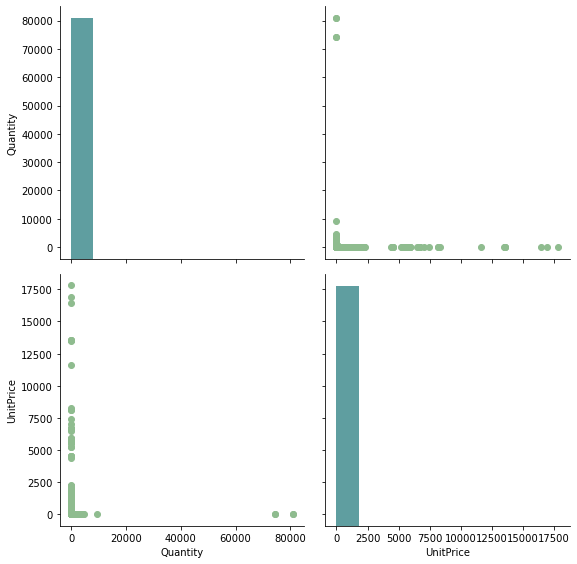

In [172]:
grid = sns.PairGrid(data= transactions, vars = transactions[['Quantity', 'UnitPrice']], height = 4)
grid = grid.map_upper(plt.scatter, color = 'darkseagreen')
grid = grid.map_diag(plt.hist, bins = 10, color = 'cadetblue')
grid = grid.map_lower(plt.scatter, color = 'darkseagreen')

It is expected to have unidimensional outliers, so let's remove them by analysing the box plots and histograms

In [87]:
def show_plots(feature):
    fig = px.histogram(transactions, x=transactions[feature], color_discrete_sequence=['darkseagreen'], template='plotly_white', \
                   width=950, height=350)
    fig.show(renderer = 'browser')

    fig = px.box(transactions, y=transactions[feature], color_discrete_sequence=['dimgrey'], template='plotly_white', \
                 width=400, height=350)
    fig.show(renderer = 'browser')

In [90]:
show_plots('Quantity')

In [184]:
show_plots('UnitPrice')

In [7]:
data = transactions.copy()

In [8]:
filter = (
   (data['Quantity'] < 2500)
   &
   (data['UnitPrice'] < 4000)
)

data = data[filter]

perc_outliers = np.round((transactions.shape[0] - data.shape[0]) / transactions.shape[0] * 100, 2)
print(f'Percentage of observations removed: {perc_outliers}%')

Percentage of observations removed: 0.01%


<a class="anchor" id="visualexploration">

__`2.4. Visual Exploration`__ 
    
</a>

- Number of transactions per country
- Most frequent products
- Most frequent products of the most common countries
- Amount of transactions and cancellations over time
- Percentage of cancellations over time

In [11]:
aux1 = data.drop_duplicates(subset = ['InvoiceNo'], keep = 'first')

Text(0, 0.5, 'Count')

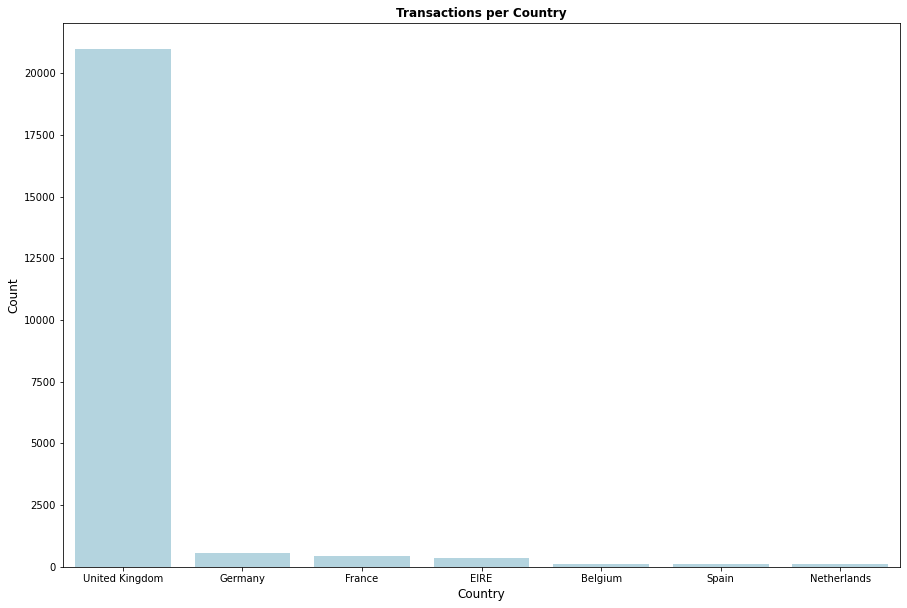

In [12]:
# Display amount of transactions per country
plt.figure(figsize=(15,10))
sns.countplot(x='Country', data = aux1,
              order=(pd.value_counts(aux1['Country']).head(7).index), color='lightblue')
plt.title('Transactions per Country', weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [13]:
aux3 = transactions[['InvoiceNo', 'StockCode',]].groupby('StockCode').count().sort_values('InvoiceNo', ascending = False).head(5)
aux3

,InvoiceNo
StockCode,
85123A,2307
22423,2198
85099B,2156
47566,1726
20725,1639


In [14]:
transactionsUK = transactions[transactions['Country'] == 'United Kingdom']
auxUK = transactionsUK[['InvoiceNo', 'StockCode',]].groupby('StockCode').count().sort_values('InvoiceNo', ascending = False).head(5)
auxUK

,InvoiceNo
StockCode,
85123A,2209
85099B,1998
22423,1858
47566,1633
20725,1460


In [15]:
transactionsG = transactions[transactions['Country'] == 'Germany']
auxG = transactionsG[['InvoiceNo', 'StockCode',]].groupby('StockCode').count().sort_values('InvoiceNo', ascending = False).head(5)
auxG

,InvoiceNo
StockCode,
22326,120
22423,81
22328,78
22554,67
20719,59


In [16]:
transactionsF = transactions[transactions['Country'] == 'France']
auxF = transactionsF[['InvoiceNo', 'StockCode',]].groupby('StockCode').count().sort_values('InvoiceNo', ascending = False).head(5)
auxF

,InvoiceNo
StockCode,
23084,75
21731,72
22554,68
22556,68
22326,65


Text(0, 0.5, 'Count')

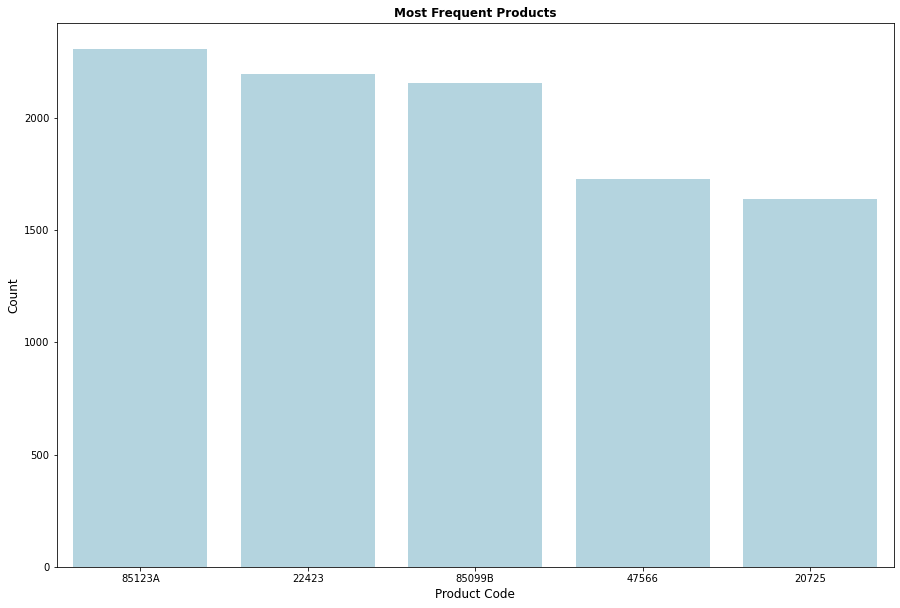

In [17]:
# Display amount of transactions per country
plt.figure(figsize=(15,10))
sns.barplot(x=aux3.index, y = 'InvoiceNo',data = aux3,
              color='lightblue')
plt.title('Most Frequent Products', weight='bold')
plt.xlabel('Product Code', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

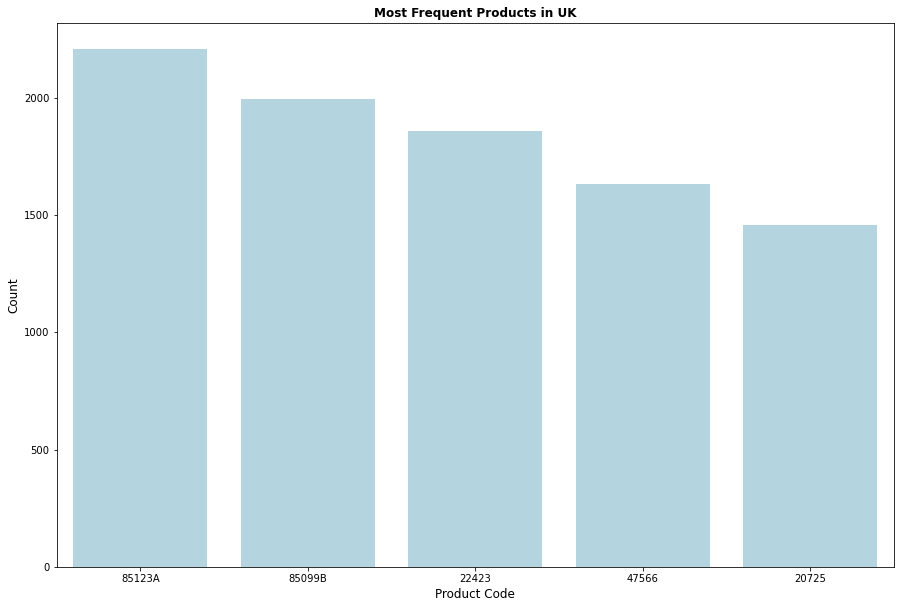

In [18]:
# Display most common products in UK
plt.figure(figsize=(15,10))
sns.barplot(x=auxUK.index, y = 'InvoiceNo',data = auxUK, 
              color='lightblue')
plt.title('Most Frequent Products in UK', weight='bold')
plt.xlabel('Product Code', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

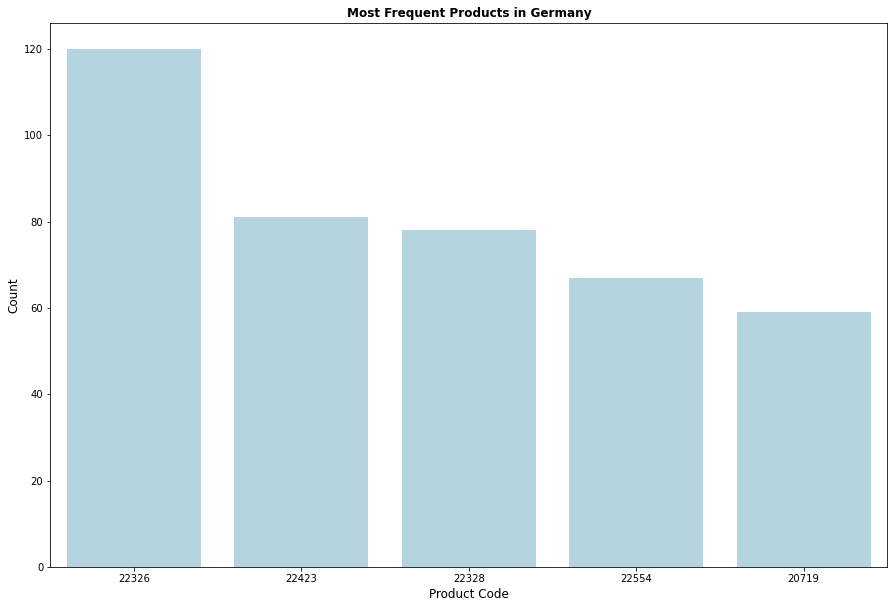

In [19]:
# Display most common products in Germany
plt.figure(figsize=(15,10))
sns.barplot(x=auxG.index, y = 'InvoiceNo',data = auxG, 
              color='lightblue')
plt.title('Most Frequent Products in Germany', weight='bold')
plt.xlabel('Product Code', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

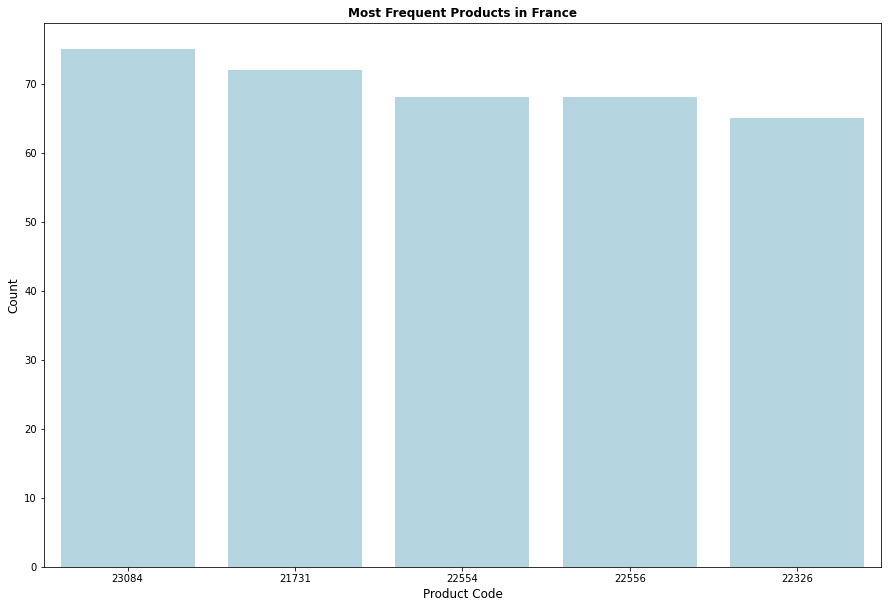

In [20]:
# Display most common products in France
plt.figure(figsize=(15,10))
sns.barplot(x=auxF.index, y = 'InvoiceNo',data = auxF, 
              color='lightblue')
plt.title('Most Frequent Products in France', weight='bold')
plt.xlabel('Product Code', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [21]:
aux1['InvoiceDate'] = pd.to_datetime(aux1['InvoiceDate'])
aux1['Year'] = pd.to_datetime(aux1['InvoiceDate']).dt.year
aux1['Month'] = pd.to_datetime(aux1['InvoiceDate']).dt.month
aux1['Day'] = pd.to_datetime(aux1['InvoiceDate']).dt.day
aux1['Date'] = pd.to_datetime(aux1['InvoiceDate']).dt.date

<ipython-input-21-b1e613eae010>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux1['InvoiceDate'] = pd.to_datetime(aux1['InvoiceDate'])
<ipython-input-21-b1e613eae010>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux1['Year'] = pd.to_datetime(aux1['InvoiceDate']).dt.year
<ipython-input-21-b1e613eae010>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [22]:
aux1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,2010-12-01
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010,12,1,2010-12-01
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010,12,1,2010-12-01
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,2010,12,1,2010-12-01
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,2010,12,1,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777.0,United Kingdom,2011,12,9,2011-12-09
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777.0,United Kingdom,2011,12,9,2011-12-09
541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,2011-12-09 12:31:00,0.39,15804.0,United Kingdom,2011,12,9,2011-12-09
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,2011,12,9,2011-12-09


In [23]:
auxC = aux1[aux1['InvoiceNo'].str.startswith('C')]
auxC

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Date
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010,12,1,2010-12-01
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,12,1,2010-12-01
939,C536506,22960,JAM MAKING SET WITH JARS,6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom,2010,12,1,2010-12-01
1441,C536543,22632,HAND WARMER RED RETROSPOT,1,2010-12-01 14:30:00,2.10,17841.0,United Kingdom,2010,12,1,2010-12-01
1973,C536548,22244,3 HOOK HANGER MAGIC GARDEN,4,2010-12-01 14:33:00,1.95,12472.0,Germany,2010,12,1,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...
540141,C581468,21314,SMALL GLASS HEART TRINKET POT,10,2011-12-08 19:26:00,2.10,13599.0,United Kingdom,2011,12,8,2011-12-08
540176,C581470,23084,RABBIT NIGHT LIGHT,4,2011-12-08 19:28:00,2.08,17924.0,United Kingdom,2011,12,8,2011-12-08
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom,2011,12,9,2011-12-09
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011,12,9,2011-12-09


In [24]:
auxT = aux1[~aux1['InvoiceNo'].str.startswith('C')]
auxT

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,2010-12-01
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010,12,1,2010-12-01
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010,12,1,2010-12-01
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,2010,12,1,2010-12-01
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,2010,12,1,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777.0,United Kingdom,2011,12,9,2011-12-09
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777.0,United Kingdom,2011,12,9,2011-12-09
541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,2011-12-09 12:31:00,0.39,15804.0,United Kingdom,2011,12,9,2011-12-09
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,2011,12,9,2011-12-09


In [162]:
# auxT = auxT[['InvoiceNo', 'Date']].groupby('Date').count()
# auxT.reset_index(inplace = True)
# auxT

,Date,InvoiceNo
0,2010-12-01,127
1,2010-12-02,142
2,2010-12-03,68
3,2010-12-05,88
4,2010-12-06,102
...,...,...
300,2011-12-05,126
301,2011-12-06,114
302,2011-12-07,106
303,2011-12-08,120


In [25]:
auxT = auxT[['InvoiceNo', 'Month', 'Year']].groupby(['Month', 'Year']).count()
auxT.reset_index(inplace = True)
auxT

,Month,Year,InvoiceNo
0,1,2011,1081
1,2,2011,1092
2,3,2011,1441
3,4,2011,1236
4,5,2011,1668
5,6,2011,1525
6,7,2011,1451
7,8,2011,1340
8,9,2011,1821
9,10,2011,2007


In [26]:
auxT['MonthYear'] = auxT['Month'].astype(str) + '-' + auxT['Year'].astype(str)
auxT.sort_values(by = ['Year', 'Month'], inplace = True)
auxT

,Month,Year,InvoiceNo,MonthYear
11,12,2010,1552,12-2010
0,1,2011,1081,1-2011
1,2,2011,1092,2-2011
2,3,2011,1441,3-2011
3,4,2011,1236,4-2011
4,5,2011,1668,5-2011
5,6,2011,1525,6-2011
6,7,2011,1451,7-2011
7,8,2011,1340,8-2011
8,9,2011,1821,9-2011


In [27]:
auxC = auxC[['InvoiceNo', 'Month', 'Year']].groupby(['Month', 'Year']).count()
auxC.reset_index(inplace = True)
auxC

,Month,Year,InvoiceNo
0,1,2011,247
1,2,2011,195
2,3,2011,284
3,4,2011,221
4,5,2011,270
5,6,2011,301
6,7,2011,237
7,8,2011,244
8,9,2011,305
9,10,2011,317


In [28]:
auxC['MonthYear'] = auxC['Month'].astype(str) + '-' + auxC['Year'].astype(str)
auxC.sort_values(by = ['Year', 'Month'], inplace = True)
auxC

,Month,Year,InvoiceNo,MonthYear
11,12,2010,303,12-2010
0,1,2011,247,1-2011
1,2,2011,195,2-2011
2,3,2011,284,3-2011
3,4,2011,221,4-2011
4,5,2011,270,5-2011
5,6,2011,301,6-2011
6,7,2011,237,7-2011
7,8,2011,244,8-2011
8,9,2011,305,9-2011


Text(0, 0.5, 'Count')

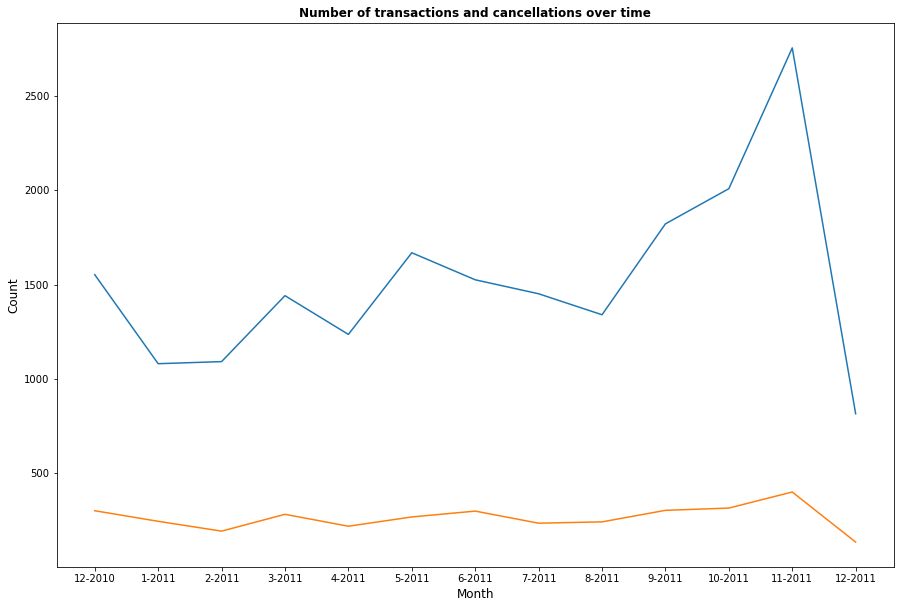

In [29]:
# Display the number of transactions and cancellations per month and year
plt.figure(figsize=(15,10))
sns.lineplot(x='MonthYear', y='InvoiceNo', data=auxT)
sns.lineplot(x='MonthYear', y='InvoiceNo', data=auxC)
plt.title('Number of transactions and cancellations over time', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [30]:
auxT.rename(columns = {'InvoiceNo':'Number of Transactions'}, inplace = True)
auxT.drop(['Month', 'Year'], axis = 1, inplace = True)
auxT

,Number of Transactions,MonthYear
11,1552,12-2010
0,1081,1-2011
1,1092,2-2011
2,1441,3-2011
3,1236,4-2011
4,1668,5-2011
5,1525,6-2011
6,1451,7-2011
7,1340,8-2011
8,1821,9-2011


In [31]:
auxC.rename(columns = {'InvoiceNo':'Number of Cancellations'}, inplace = True)
auxC.drop(['Month', 'Year'], axis = 1, inplace = True)
auxC

,Number of Cancellations,MonthYear
11,303,12-2010
0,247,1-2011
1,195,2-2011
2,284,3-2011
3,221,4-2011
4,270,5-2011
5,301,6-2011
6,237,7-2011
7,244,8-2011
8,305,9-2011


In [32]:
aux = pd.merge(auxT, auxC)
aux

,Number of Transactions,MonthYear,Number of Cancellations
0,1552,12-2010,303
1,1081,1-2011,247
2,1092,2-2011,195
3,1441,3-2011,284
4,1236,4-2011,221
5,1668,5-2011,270
6,1525,6-2011,301
7,1451,7-2011,237
8,1340,8-2011,244
9,1821,9-2011,305


In [33]:
aux['Percentage of Cancellations'] = (aux['Number of Cancellations']/aux['Number of Transactions'])*100
aux

,Number of Transactions,MonthYear,Number of Cancellations,Percentage of Cancellations
0,1552,12-2010,303,19.523196
1,1081,1-2011,247,22.849214
2,1092,2-2011,195,17.857143
3,1441,3-2011,284,19.708536
4,1236,4-2011,221,17.880259
5,1668,5-2011,270,16.187050
6,1525,6-2011,301,19.737705
7,1451,7-2011,237,16.333563
8,1340,8-2011,244,18.208955
9,1821,9-2011,305,16.749039


Text(0, 0.5, 'Percentage')

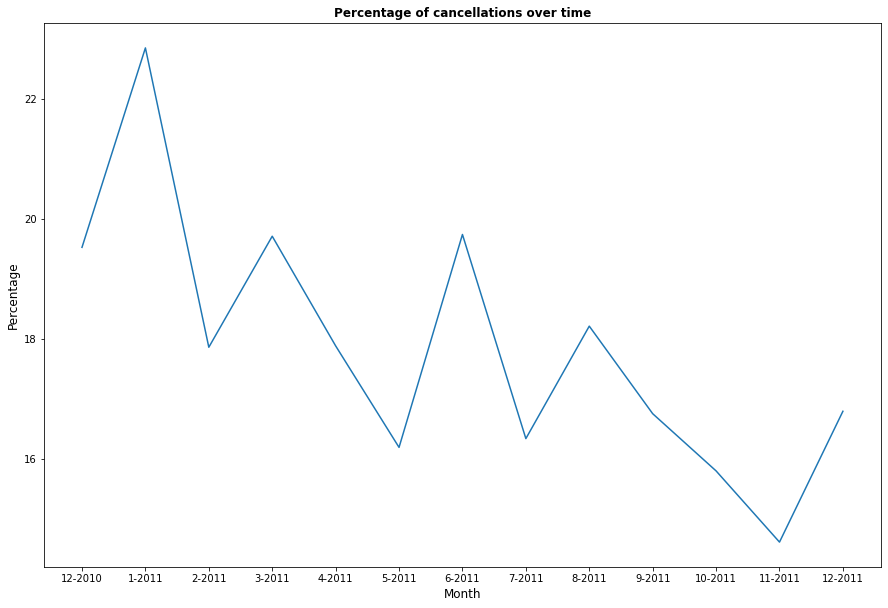

In [34]:
# Display the percentage of cancellations per month and year
plt.figure(figsize=(15,10))
sns.lineplot(x='MonthYear', y='Percentage of Cancellations', data=aux)
plt.title('Percentage of cancellations over time', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

## Market Basket Analysis

The objetive is to identify products frequently purchased together and make recommendations based on these findings
1. Construct association rules
2. Identify items frequently purchased together

**Divide the data into two datasets:**
- Usual Customers (quantity < 50)
- Wholesalers (quantity >= 50)

In [23]:
cdata = data[data['Quantity'] < 50] # 524046 rows
wdata = data[data['Quantity'] >= 50] # 13340 rows

In [24]:
cdata.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     131079
Country             0
dtype: int64

Instead of dropping all the records with missing values in the CustomerID variable, we can remove this column in these analysis because it is not relevant to find patterns in the purchase of products.
We can also remove the Country column.

In [36]:
data_mba = cdata.drop('CustomerID', axis = 1)
data_mba.drop('Country', axis = 1, inplace = True)

In [37]:
data_mba.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
dtype: int64

In [38]:
data_mba[data_mba['StockCode'] == '85123A']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 9:02,2.55
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 9:32,2.55
262,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,12/1/2010 10:39,2.55
278,536396,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 10:51,2.55
...,...,...,...,...,...,...
539342,581439,85123A,CREAM HANGING HEART T-LIGHT HOLDER,1,12/8/2011 16:30,5.79
539979,581452,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,12/8/2011 18:03,2.55
540217,581472,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/8/2011 19:55,2.95
540837,581492,85123A,CREAM HANGING HEART T-LIGHT HOLDER,3,12/9/2011 10:03,5.79


In [41]:
len(data_mba['InvoiceNo'].unique())

22332

In [39]:
len(data_mba['Description'].unique())

4024

In [40]:
len(data_mba['StockCode'].unique())

3924

So, it is expected tha Basket has 23412 rows and 3924 columns

In [42]:
basket = (data_mba.groupby(['InvoiceNo', 'StockCode'])['Quantity'].sum().unstack().reset_index()
          .fillna(0).set_index('InvoiceNo'))

In [43]:
basket

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,DCGS0070,DCGS0076,DCGSSBOY,DCGSSGIRL,PADS,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C581470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C581490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Basket shows the quantity of each item that was bought in each transaction. However, we only want to know which items were bought together and not the quantity of each item, so let's encode the table with only binary values (1 if the item was purchased, 0 otherwise) and drop the column with the postage.

In [44]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

In [45]:
basket_sets

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,DCGS0070,DCGS0076,DCGSSBOY,DCGSSGIRL,PADS,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581468,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's filter the basket sets to have only the transactions with more than 1 item, the others would not be relevant to define association rules.

In [46]:
basket_sets = basket_sets[(basket_sets > 0).sum(axis = 1) >= 2]
basket_sets

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,DCGS0070,DCGS0076,DCGSSBOY,DCGSSGIRL,PADS,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581468,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
19209/22332

0.8601558301988178

**86% of the transactions include more than 1 item.**

In [75]:
frequent_itemsets = apriori(basket_sets, min_support=0.031, use_colnames=True)

In [71]:
aux_frequent_itemsets = apriori(basket_sets, min_support=0.028, use_colnames=True)

In [72]:
aux_frequent_itemsets['length'] = aux_frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [73]:
aux_frequent_itemsets

,support,itemsets,length
0,0.035764,(20685),1
1,0.043365,(20712),1
2,0.031548,(20713),1
3,0.029465,(20718),1
4,0.040606,(20719),1
...,...,...,...
167,0.031392,"(22698, 22699)",2
168,0.033109,"(22726, 22727)",2
169,0.028372,"(85099B, 23203)",2
170,0.028476,"(85099B, 85099C)",2


In [87]:
aux_frequent_itemsets = aux_frequent_itemsets[aux_frequent_itemsets['length'] > 1]

In [88]:
aux_frequent_itemsets

,support,itemsets,length
156,0.032641,"(20725, 20727)",2
157,0.028268,"(20725, 22382)",2
158,0.033266,"(20725, 22383)",2
159,0.030507,"(20725, 22384)",2
160,0.028268,"(20725, 85099B)",2
161,0.029882,"(20727, 22383)",2
162,0.035556,"(85099B, 21931)",2
163,0.039617,"(85099B, 22386)",2
164,0.033578,"(22411, 85099B)",2
165,0.033109,"(22698, 22697)",2


In [76]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(40)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(20725),(20727),0.079234,0.065334,0.032641,0.411958,6.305419,0.027464,1.589454
1,(20727),(20725),0.065334,0.079234,0.032641,0.499602,6.305419,0.027464,1.840066
2,(20725),(22383),0.079234,0.066011,0.033266,0.419842,6.360214,0.028035,1.609889
3,(22383),(20725),0.066011,0.079234,0.033266,0.503943,6.360214,0.028035,1.856171
4,(85099B),(21931),0.098287,0.059139,0.035556,0.361758,6.117094,0.029744,1.474146
5,(21931),(85099B),0.059139,0.098287,0.035556,0.601232,6.117094,0.029744,2.261249
6,(85099B),(22386),0.098287,0.058879,0.039617,0.403072,6.845810,0.033830,1.576608
7,(22386),(85099B),0.058879,0.098287,0.039617,0.672856,6.845810,0.033830,2.756317
8,(22411),(85099B),0.059139,0.098287,0.033578,0.567782,5.776758,0.027765,2.086244
9,(85099B),(22411),0.098287,0.059139,0.033578,0.341631,5.776758,0.027765,1.429079


In [78]:
cdata[(cdata['StockCode'] == '20725') | (cdata['StockCode'] == '20727')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
93,536378,20725,LUNCH BAG RED RETROSPOT,10,12/1/2010 9:37,1.65,14688.0,United Kingdom
368,536401,20725,LUNCH BAG RED RETROSPOT,1,12/1/2010 11:21,1.65,15862.0,United Kingdom
413,536404,20727,LUNCH BAG BLACK SKULL.,10,12/1/2010 11:29,1.65,16218.0,United Kingdom
546,536412,20727,LUNCH BAG BLACK SKULL.,3,12/1/2010 11:49,1.65,17920.0,United Kingdom
614,536412,20725,LUNCH BAG RED RETROSPOT,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
540763,581492,20725,LUNCH BAG RED RETROSPOT,1,12/9/2011 10:03,4.13,NaN,United Kingdom
541267,581497,20727,LUNCH BAG BLACK SKULL.,8,12/9/2011 10:23,4.96,NaN,United Kingdom
541695,581538,20727,LUNCH BAG BLACK SKULL.,1,12/9/2011 11:34,1.65,14446.0,United Kingdom
541696,581538,20725,LUNCH BAG RED RETROSPOT,1,12/9/2011 11:34,1.65,14446.0,United Kingdom


In [79]:
cdata[(cdata['StockCode'] == '20725') | (cdata['StockCode'] == '22383')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
93,536378,20725,LUNCH BAG RED RETROSPOT,10,12/1/2010 9:37,1.65,14688.0,United Kingdom
368,536401,20725,LUNCH BAG RED RETROSPOT,1,12/1/2010 11:21,1.65,15862.0,United Kingdom
411,536404,22383,LUNCH BAG SUKI DESIGN,10,12/1/2010 11:29,1.65,16218.0,United Kingdom
545,536412,22383,LUNCH BAG SUKI DESIGN,3,12/1/2010 11:49,1.65,17920.0,United Kingdom
614,536412,20725,LUNCH BAG RED RETROSPOT,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
539989,581453,22383,LUNCH BAG SUKI DESIGN,10,12/8/2011 18:15,1.65,16401.0,United Kingdom
540763,581492,20725,LUNCH BAG RED RETROSPOT,1,12/9/2011 10:03,4.13,NaN,United Kingdom
541289,581497,22383,LUNCH BAG SUKI DESIGN,2,12/9/2011 10:23,4.96,NaN,United Kingdom
541696,581538,20725,LUNCH BAG RED RETROSPOT,1,12/9/2011 11:34,1.65,14446.0,United Kingdom


In [80]:
cdata[(cdata['StockCode'] == '85099B') | (cdata['StockCode'] == '21931')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
103,536378,21931,JUMBO STORAGE BAG SUKI,10,12/1/2010 9:37,1.95,14688.0,United Kingdom
510,536409,21931,JUMBO STORAGE BAG SUKI,2,12/1/2010 11:45,1.95,17908.0,United Kingdom
533,536409,85099B,JUMBO BAG RED RETROSPOT,2,12/1/2010 11:45,1.95,17908.0,United Kingdom
790,536464,85099B,JUMBO BAG RED RETROSPOT,1,12/1/2010 12:23,1.95,17968.0,United Kingdom
1069,536522,85099B,JUMBO BAG RED RETROSPOT,1,12/1/2010 12:49,1.95,15012.0,United Kingdom
...,...,...,...,...,...,...,...,...
540434,581486,85099B,JUMBO BAG RED RETROSPOT,10,12/9/2011 9:38,2.08,17001.0,United Kingdom
540690,581492,21931,JUMBO STORAGE BAG SUKI,1,12/9/2011 10:03,4.13,NaN,United Kingdom
541370,581498,21931,JUMBO STORAGE BAG SUKI,6,12/9/2011 10:26,4.13,NaN,United Kingdom
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom


In [81]:
cdata[(cdata['StockCode'] == '85099B') | (cdata['StockCode'] == '22386')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
86,536378,22386,JUMBO BAG PINK POLKADOT,10,12/1/2010 9:37,1.95,14688.0,United Kingdom
533,536409,85099B,JUMBO BAG RED RETROSPOT,2,12/1/2010 11:45,1.95,17908.0,United Kingdom
789,536464,22386,JUMBO BAG PINK POLKADOT,1,12/1/2010 12:23,1.95,17968.0,United Kingdom
790,536464,85099B,JUMBO BAG RED RETROSPOT,1,12/1/2010 12:23,1.95,17968.0,United Kingdom
1069,536522,85099B,JUMBO BAG RED RETROSPOT,1,12/1/2010 12:49,1.95,15012.0,United Kingdom
...,...,...,...,...,...,...,...,...
539585,581439,22386,JUMBO BAG PINK POLKADOT,2,12/8/2011 16:30,4.13,NaN,United Kingdom
540434,581486,85099B,JUMBO BAG RED RETROSPOT,10,12/9/2011 9:38,2.08,17001.0,United Kingdom
541421,581498,22386,JUMBO BAG PINK POLKADOT,1,12/9/2011 10:26,4.13,NaN,United Kingdom
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom


In [84]:
cdata[(cdata['StockCode'] == '85099B') | (cdata['StockCode'] == '22411')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
108,536381,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,10,12/1/2010 9:41,1.95,15311.0,United Kingdom
145,536382,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,10,12/1/2010 9:45,1.95,16098.0,United Kingdom
533,536409,85099B,JUMBO BAG RED RETROSPOT,2,12/1/2010 11:45,1.95,17908.0,United Kingdom
790,536464,85099B,JUMBO BAG RED RETROSPOT,1,12/1/2010 12:23,1.95,17968.0,United Kingdom
881,536477,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,10,12/1/2010 12:27,1.95,16210.0,United Kingdom
...,...,...,...,...,...,...,...,...
540434,581486,85099B,JUMBO BAG RED RETROSPOT,10,12/9/2011 9:38,2.08,17001.0,United Kingdom
540913,581492,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,1,12/9/2011 10:03,4.13,NaN,United Kingdom
541422,581498,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,2,12/9/2011 10:26,4.13,NaN,United Kingdom
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom


In [85]:
cdata[(cdata['StockCode'] == '22698') | (cdata['StockCode'] == '22697') | (cdata['StockCode'] == '22699')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1077,536523,22699,ROSES REGENCY TEACUP AND SAUCER,6,12/1/2010 12:50,2.95,12868.0,United Kingdom
1086,536524,22697,GREEN REGENCY TEACUP AND SAUCER,6,12/1/2010 12:51,2.95,17572.0,United Kingdom
1193,536530,22699,ROSES REGENCY TEACUP AND SAUCER,4,12/1/2010 13:21,2.95,17905.0,United Kingdom
1644,536544,22697,GREEN REGENCY TEACUP AND SAUCER,6,12/1/2010 14:32,5.91,NaN,United Kingdom
1645,536544,22699,ROSES REGENCY TEACUP AND SAUCER,2,12/1/2010 14:32,5.91,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541220,581495,22697,GREEN REGENCY TEACUP AND SAUCER,12,12/9/2011 10:20,2.95,14051.0,United Kingdom
541449,581498,22697,GREEN REGENCY TEACUP AND SAUCER,6,12/9/2011 10:26,5.79,NaN,United Kingdom
541450,581498,22698,PINK REGENCY TEACUP AND SAUCER,9,12/9/2011 10:26,5.79,NaN,United Kingdom
541451,581498,22699,ROSES REGENCY TEACUP AND SAUCER,6,12/9/2011 10:26,5.79,NaN,United Kingdom


In [86]:
cdata[(cdata['StockCode'] == '22726') | (cdata['StockCode'] == '22727')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France
149,536382,22726,ALARM CLOCK BAKELIKE GREEN,4,12/1/2010 9:45,3.75,16098.0,United Kingdom
205,536389,22726,ALARM CLOCK BAKELIKE GREEN,4,12/1/2010 10:03,3.75,12431.0,Australia
206,536389,22727,ALARM CLOCK BAKELIKE RED,4,12/1/2010 10:03,3.75,12431.0,Australia
...,...,...,...,...,...,...,...,...
541293,581497,22727,ALARM CLOCK BAKELIKE RED,10,12/9/2011 10:23,8.29,NaN,United Kingdom
541879,581585,22726,ALARM CLOCK BAKELIKE GREEN,8,12/9/2011 12:31,3.75,15804.0,United Kingdom
541880,581585,22727,ALARM CLOCK BAKELIKE RED,4,12/9/2011 12:31,3.75,15804.0,United Kingdom
541898,581587,22727,ALARM CLOCK BAKELIKE RED,4,12/9/2011 12:50,3.75,12680.0,France


In [98]:
cdata[(cdata['StockCode'] == '20725') | (cdata['StockCode'] == '20727')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
93,536378,20725,LUNCH BAG RED RETROSPOT,10,12/1/2010 9:37,1.65,14688.0,United Kingdom
368,536401,20725,LUNCH BAG RED RETROSPOT,1,12/1/2010 11:21,1.65,15862.0,United Kingdom
413,536404,20727,LUNCH BAG BLACK SKULL.,10,12/1/2010 11:29,1.65,16218.0,United Kingdom
546,536412,20727,LUNCH BAG BLACK SKULL.,3,12/1/2010 11:49,1.65,17920.0,United Kingdom
614,536412,20725,LUNCH BAG RED RETROSPOT,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
540763,581492,20725,LUNCH BAG RED RETROSPOT,1,12/9/2011 10:03,4.13,NaN,United Kingdom
541267,581497,20727,LUNCH BAG BLACK SKULL.,8,12/9/2011 10:23,4.96,NaN,United Kingdom
541695,581538,20727,LUNCH BAG BLACK SKULL.,1,12/9/2011 11:34,1.65,14446.0,United Kingdom
541696,581538,20725,LUNCH BAG RED RETROSPOT,1,12/9/2011 11:34,1.65,14446.0,United Kingdom


In [89]:
aux_frequent_itemsets

,support,itemsets,length
156,0.032641,"(20725, 20727)",2
157,0.028268,"(20725, 22382)",2
158,0.033266,"(20725, 22383)",2
159,0.030507,"(20725, 22384)",2
160,0.028268,"(20725, 85099B)",2
161,0.029882,"(20727, 22383)",2
162,0.035556,"(85099B, 21931)",2
163,0.039617,"(85099B, 22386)",2
164,0.033578,"(22411, 85099B)",2
165,0.033109,"(22698, 22697)",2


**Association Rules**
- LUNCH BAG RED RETROSPOT &#8596; LUNCH BAG BLACK SKULL
- LUNCH BAG RED RETROSPOT &#8596; LUNCH BAG SUKI DESIGN
- JUMBO STORAGE BAG SUKI &#8596; JUMBO BAG RED RETROSPOT
- JUMBO BAG PINK POLKADOT &#8596; JUMBO BAG RED RETROSPOT
- JUMBO SHOPPER VINTAGE RED PAISLEY	&#8596; JUMBO BAG RED RETROSPOT
- ALARM CLOCK BAKELIKE GREEN &#8596; ALARM CLOCK BAKELIKE RED

**Frequent item sets**
- GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER
- ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKELIKE RED
- JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG RED RETROSPOT
- JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROSPOT
- JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT
- LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROSPOT
- LUNCH BAG SUKI DESIGN, LUNCH BAG RED RETROSPOT
- LUNCH BAG BLACK SKULL, LUNCH BAG RED RETROSPOT

## Recommendation system

In [596]:
cdata = data[data['Quantity'] < 50] # 524046 rows
wdata = data[data['Quantity'] >= 50] # 13340 rows

In [597]:
cdata = cdata.dropna()

In [598]:
cdata.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [599]:
cdata

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
CustomerID,,,,,,,
17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom
17850.0,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom
17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom
17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom
17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom
...,...,...,...,...,...,...,...
12680.0,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,France
12680.0,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,France
12680.0,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,France


In [600]:
cdata.drop(['InvoiceDate', 'UnitPrice', 'Country'], axis = 1, inplace = True)

In [601]:
cdata

,InvoiceNo,StockCode,Description,Quantity
CustomerID,,,,
17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
17850.0,536365,71053,WHITE METAL LANTERN,6
17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8
17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...
12680.0,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12
12680.0,581587,22899,CHILDREN'S APRON DOLLY GIRL,6
12680.0,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4


In [603]:
cdata.dtypes

InvoiceNo      object
StockCode      object
Description    object
Quantity        int64
dtype: object

In [604]:
interactions = pd.pivot_table(cdata, index = 'CustomerID', columns = 'StockCode', values = 'Quantity')
interactions = interactions.fillna(0)

interactions.head(10)

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214T,90214U,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,CRUK,PADS
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12352.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12353.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12354.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12355.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12356.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [605]:
interactions.index = interactions.index.astype('object')

In [606]:
interactions.index.dtype

dtype('O')

In [607]:
customer_id = list(interactions.index)
customer_dict = {}
counter = 0 
for i in customer_id:
    customer_dict[i] = counter
    counter += 1

In [608]:
from scipy.sparse import csr_matrix

In [609]:
interactions_csr = csr_matrix(interactions.values)
interactions_csr

<4289x3670 sparse matrix of type '<class 'numpy.float64'>'
	with 262183 stored elements in Compressed Sparse Row format>

In [45]:
! pip install lightfm

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Administrador\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Administrador\\AppData\\Local\\Temp\\pip-install-hn_8_ves\\lightfm_e9f35a494ab94c28beb5995949c6f22b\\setup.py'"'"'; __file__='"'"'C:\\Users\\Administrador\\AppData\\Local\\Temp\\pip-install-hn_8_ves\\lightfm_e9f35a494ab94c28beb5995949c6f22b\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Administrador\AppData\Local\Temp\pip-wheel-ggpnfu1s'
       cwd: C:\Users\Administrador\AppData\Local\Temp\pip-install-hn_8_ves\lightfm_e9f35a494ab94c28beb5995949c6f22b\
  Complete output (23 lines):
  Compiling without OpenMP support.
  running bdist_wheel
  running build



  Using cached lightfm-1.16.tar.gz (310 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for lightfm
Failed to build lightfm
    Running setup.py install for lightfm: started
    Running setup.py install for lightfm: finished with status 'error'


    copying lightfm\datasets\__init__.py -> build\lib.win-amd64-3.8\lightfm\datasets
    copying lightfm\_lightfm_fast_no_openmp.c -> build\lib.win-amd64-3.8\lightfm
    copying lightfm\_lightfm_fast_openmp.c -> build\lib.win-amd64-3.8\lightfm
    running build_ext
    building 'lightfm._lightfm_fast_no_openmp' extension
    error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
    ----------------------------------------
ERROR: Command errored out with exit status 1: 'C:\Users\Administrador\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Administrador\\AppData\\Local\\Temp\\pip-install-hn_8_ves\\lightfm_e9f35a494ab94c28beb5995949c6f22b\\setup.py'"'"'; __file__='"'"'C:\\Users\\Administrador\\AppData\\Local\\Temp\\pip-install-hn_8_ves\\lightfm_e9f35a494ab94c28beb5995949c6f22b\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)

In [48]:
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import auc_score, precision_at_k, recall_at_k
from lightfm import LightFM

In [46]:
from lightfm import LightFM

C:\Users\Administrador\anaconda3\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


In [622]:
model = LightFM(loss='warp',
                random_state=2016,
                learning_rate=0.90,
                no_components=150,
                user_alpha=0.000005)

model = model.fit(interactions_csr,
                  epochs=100,
                  num_threads=16, verbose=False)

In [623]:
items_metadata = cdata.groupby('StockCode').sum('Quantity')

In [624]:
items_metadata

,Quantity
StockCode,
10002,498
10080,303
10120,193
10123C,5
10124A,16
...,...
gift_0001_10,9
gift_0001_20,10
gift_0001_30,7


In [625]:
items_metadata_csr = csr_matrix(items_metadata.values)
items_metadata_csr

<3924x1 sparse matrix of type '<class 'numpy.int64'>'
	with 3924 stored elements in Compressed Sparse Row format>

In [626]:
item_dict ={}
df = items_metadata.sort_values('StockCode').reset_index()

for i in range(df.shape[0]):
    item_dict[(df.loc[i,'StockCode'])] = df.loc[i,'StockCode']

In [627]:
customer_dict

{12347.0: 0,
 12348.0: 1,
 12349.0: 2,
 12350.0: 3,
 12352.0: 4,
 12353.0: 5,
 12354.0: 6,
 12355.0: 7,
 12356.0: 8,
 12357.0: 9,
 12358.0: 10,
 12359.0: 11,
 12360.0: 12,
 12361.0: 13,
 12362.0: 14,
 12363.0: 15,
 12364.0: 16,
 12365.0: 17,
 12367.0: 18,
 12370.0: 19,
 12371.0: 20,
 12372.0: 21,
 12373.0: 22,
 12374.0: 23,
 12375.0: 24,
 12377.0: 25,
 12378.0: 26,
 12379.0: 27,
 12380.0: 28,
 12381.0: 29,
 12383.0: 30,
 12384.0: 31,
 12386.0: 32,
 12388.0: 33,
 12390.0: 34,
 12391.0: 35,
 12393.0: 36,
 12394.0: 37,
 12395.0: 38,
 12397.0: 39,
 12398.0: 40,
 12399.0: 41,
 12401.0: 42,
 12402.0: 43,
 12403.0: 44,
 12405.0: 45,
 12406.0: 46,
 12407.0: 47,
 12408.0: 48,
 12409.0: 49,
 12410.0: 50,
 12412.0: 51,
 12413.0: 52,
 12414.0: 53,
 12415.0: 54,
 12417.0: 55,
 12418.0: 56,
 12420.0: 57,
 12421.0: 58,
 12422.0: 59,
 12423.0: 60,
 12424.0: 61,
 12425.0: 62,
 12426.0: 63,
 12427.0: 64,
 12428.0: 65,
 12429.0: 66,
 12430.0: 67,
 12431.0: 68,
 12432.0: 69,
 12433.0: 70,
 12434.0: 71,
 1

In [628]:
items_metadata_csr

<3924x1 sparse matrix of type '<class 'numpy.int64'>'
	with 3924 stored elements in Compressed Sparse Row format>

In [629]:
model

In [630]:
def sample_recommendation_user(model, interactions, customer_id, customers_dict, 
                               item_dict,threshold = 0,nrec_items = 5, show = True):
    
    n_customers, n_items = interactions.shape
    customer_x = customers_dict[customer_id]
    scores = pd.Series(model.predict(customer_x, np.arange(n_items), item_features=items_metadata_csr))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))
    
    known_items = list(pd.Series(interactions.loc[customer_id,:] \
                                 [interactions.loc[customer_id,:] > threshold].index).sort_values(ascending=False))
    
    scores = [x for x in scores if x not in known_items]
    return_score_list = scores[0:nrec_items]
    known_items = list(pd.Series(known_items).apply(lambda x: item_dict[x]))
    scores = list(pd.Series(return_score_list).apply(lambda x: item_dict[x]))
    if show == True:
        print ("User: " + str(customer_id))
        print("Known Likes:")
        counter = 1
        for i in known_items:
            print(str(counter) + '- ' + i)
            counter+=1

        print("\n Recommended Items:")
        counter = 1
        for i in scores:
            print(str(counter) + '- ' + i)
            counter+=1

In [631]:
customer_dict[12347.0]

0

In [632]:
interactions

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214T,90214U,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,CRUK,PADS
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12352.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18281.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [633]:
sample_recommendation_user(model, interactions, customer_id = 12347.0, customers_dict = customer_dict, item_dict = item_dict)

User: 12347.0
Known Likes:
1- 85232D
2- 85178
3- 85167B
4- 85116
5- 84997D
6- 84997C
7- 84997B
8- 84992
9- 84991
10- 84969
11- 84625C
12- 84625A
13- 84559B
14- 84559A
15- 84558A
16- 71477
17- 51014C
18- 47580
19- 47567B
20- 47559B
21- 23552
22- 23508
23- 23506
24- 23503
25- 23497
26- 23480
27- 23422
28- 23421
29- 23420
30- 23316
31- 23308
32- 23297
33- 23271
34- 23177
35- 23175
36- 23174
37- 23173
38- 23172
39- 23171
40- 23170
41- 23162
42- 23147
43- 23146
44- 23084
45- 22992
46- 22945
47- 22821
48- 22805
49- 22775
50- 22774
51- 22773
52- 22772
53- 22771
54- 22729
55- 22728
56- 22727
57- 22726
58- 22725
59- 22699
60- 22698
61- 22697
62- 22621
63- 22561
64- 22550
65- 22497
66- 22494
67- 22492
68- 22432
69- 22423
70- 22422
71- 22417
72- 22376
73- 22375
74- 22374
75- 22372
76- 22371
77- 22252
78- 22212
79- 22196
80- 22195
81- 22134
82- 22131
83- 21976
84- 21975
85- 21832
86- 21791
87- 21731
88- 21636
89- 21578
90- 21265
91- 21171
92- 21154
93- 21064
94- 21041
95- 21035
96- 20966
97- 20782

## Cold Start Problem

In [157]:
cdata = data[data['Quantity'] < 50] # 524046 rows
wdata = data[data['Quantity'] >= 50] # 13340 rows

In [158]:
cdata

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
CustomerID,,,,,,,
17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom
17850.0,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom
17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom
17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom
17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom
...,...,...,...,...,...,...,...
12680.0,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,France
12680.0,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,France
12680.0,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,France


In [159]:
aux_data = cdata.groupby('CustomerID').sum('UnitPrice')
aux_data

,Quantity,UnitPrice
CustomerID,,
12347.0,2218,480.17
12348.0,236,6.20
12349.0,630,305.10
12350.0,196,25.30
12352.0,589,330.50
...,...,...
18280.0,45,47.65
18281.0,54,39.36
18282.0,108,62.68


In [173]:
aux_data2 = cdata[~cdata.index.duplicated()]
aux_data2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
CustomerID,,,,,,,
17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom
13047.0,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,United Kingdom
12583.0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,France
15100.0,536374,21258,VICTORIAN SEWING BOX LARGE,32,12/1/2010 9:09,10.95,United Kingdom
15291.0,536376,22114,HOT WATER BOTTLE TEA AND SYMPATHY,48,12/1/2010 9:32,3.45,United Kingdom
...,...,...,...,...,...,...,...
13436.0,581233,22178,VICTORIAN GLASS HANGING T-LIGHT,6,12/8/2011 10:33,1.95,United Kingdom
15520.0,581241,22922,FRIDGE MAGNETS US DINER ASSORTED,12,12/8/2011 10:58,0.85,United Kingdom
13298.0,581385,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,24,12/8/2011 13:11,3.75,United Kingdom


In [175]:
aux_data2.drop(['Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'InvoiceNo', 'StockCode'], axis = 1, inplace = True)
aux_data2

C:\Users\Administrador\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Country
CustomerID,
17850.0,United Kingdom
13047.0,United Kingdom
12583.0,France
15100.0,United Kingdom
15291.0,United Kingdom
...,...
13436.0,United Kingdom
15520.0,United Kingdom
13298.0,United Kingdom


In [180]:
aux_data2 = aux_data2[~aux_data2.index.isna()]

In [181]:
aux_data2

,Country
CustomerID,
17850.0,United Kingdom
13047.0,United Kingdom
12583.0,France
15100.0,United Kingdom
15291.0,United Kingdom
...,...
13436.0,United Kingdom
15520.0,United Kingdom
13298.0,United Kingdom


In [426]:
df = pd.merge(aux_data, aux_data2, how = 'left', on = aux_data2.index)

In [427]:
df.set_index('key_0')

,Quantity,UnitPrice,Country
key_0,,,
17850.0,2218,480.17,United Kingdom
13047.0,236,6.20,United Kingdom
12583.0,630,305.10,France
15100.0,196,25.30,United Kingdom
15291.0,589,330.50,United Kingdom
...,...,...,...
13436.0,45,47.65,United Kingdom
15520.0,54,39.36,United Kingdom
13298.0,108,62.68,United Kingdom


In [428]:
df.rename(columns={'Quantity': 'Total Quantity', 'UnitPrice':'Money Spent'}, index={'key_0': 'CustomerID'}, inplace=True)

In [429]:
df.rename(columns = {'key_0':'CustomerID'}, inplace = True)

In [430]:
df.set_index('CustomerID')

,Total Quantity,Money Spent,Country
CustomerID,,,
17850.0,2218,480.17,United Kingdom
13047.0,236,6.20,United Kingdom
12583.0,630,305.10,France
15100.0,196,25.30,United Kingdom
15291.0,589,330.50,United Kingdom
...,...,...,...
13436.0,45,47.65,United Kingdom
15520.0,54,39.36,United Kingdom
13298.0,108,62.68,United Kingdom


In [432]:
country = pd.DataFrame(pd.get_dummies(df['Country'], drop_first = True, dtype=bool))

In [433]:
df = pd.concat((df,country), axis=1)

In [434]:
df['Austria'] = df['Austria'].astype('int')

In [435]:
df.iloc[:,4:] = df.iloc[:,4:].astype('int')

In [436]:
df.drop('Country', axis = 1, inplace = True)
df

,CustomerID,Total Quantity,Money Spent,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,17850.0,2218,480.17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,13047.0,236,6.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,12583.0,630,305.10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15100.0,196,25.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,15291.0,589,330.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4284,13436.0,45,47.65,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4285,15520.0,54,39.36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4286,13298.0,108,62.68,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4287,14569.0,1395,1214.98,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [437]:
df.drop('Unspecified', axis = 1, inplace = True)
df

,CustomerID,Total Quantity,Money Spent,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,...,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
0,17850.0,2218,480.17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,13047.0,236,6.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,12583.0,630,305.10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15100.0,196,25.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,15291.0,589,330.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4284,13436.0,45,47.65,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4285,15520.0,54,39.36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4286,13298.0,108,62.68,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4287,14569.0,1395,1214.98,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [438]:
df.set_index('CustomerID', inplace = True)

In [439]:
df

,Total Quantity,Money Spent,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,...,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
CustomerID,,,,,,,,,,,,,,,,,,,,,
17850.0,2218,480.17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13047.0,236,6.20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12583.0,630,305.10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15100.0,196,25.30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15291.0,589,330.50,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13436.0,45,47.65,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15520.0,54,39.36,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13298.0,108,62.68,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [211]:
from sklearn.cluster import KMeans

In [448]:
# range_clusters = range(1, 10)

# inertia = []
# for n_clus in range_clusters:  # iterate over desired ncluster range
#     kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=8, random_state=1)
#     kmclust.fit(df)
#     inertia.append(kmclust.inertia_)  # save the inertia of the given 

In [495]:
range_clusters = range(1, 10)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMedoids(n_clusters=n_clus, init='heuristic', random_state=1)
    kmclust.fit(df)
    inertia.append(kmclust.inertia_)  # save the inertia of the given 

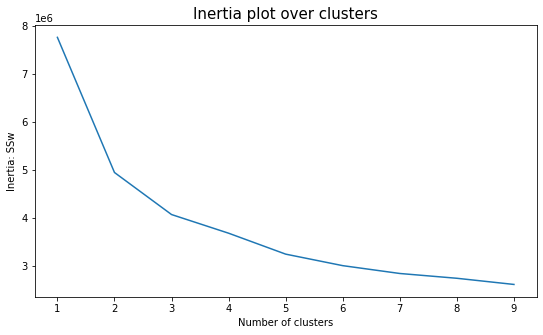

In [496]:
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

In [499]:
n_clus = 3

In [500]:
kmclust = KMedoids(n_clusters=n_clus, init='heuristic', random_state=1)

In [501]:
km_labels = kmclust.fit_predict(df)
km_labels

array([0, 2, 2, ..., 2, 1, 2], dtype=int64)

In [502]:
df

,CustomerID,Total Quantity,Money Spent,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,...,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
0,17850.0,2218,480.17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,13047.0,236,6.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,12583.0,630,305.10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15100.0,196,25.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,15291.0,589,330.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4284,13436.0,45,47.65,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4285,15520.0,54,39.36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4286,13298.0,108,62.68,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4287,14569.0,1395,1214.98,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [503]:
pd.Series(km_labels, name='labels').unique()

array([0, 2, 1], dtype=int64)

In [504]:
df

,CustomerID,Total Quantity,Money Spent,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,...,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
0,17850.0,2218,480.17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,13047.0,236,6.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,12583.0,630,305.10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15100.0,196,25.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,15291.0,589,330.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4284,13436.0,45,47.65,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4285,15520.0,54,39.36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4286,13298.0,108,62.68,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4287,14569.0,1395,1214.98,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [445]:
df.reset_index(inplace = True)
df

,CustomerID,Total Quantity,Money Spent,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,...,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
0,17850.0,2218,480.17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,13047.0,236,6.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,12583.0,630,305.10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15100.0,196,25.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,15291.0,589,330.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4284,13436.0,45,47.65,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4285,15520.0,54,39.36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4286,13298.0,108,62.68,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4287,14569.0,1395,1214.98,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [505]:
# Characterizing the final clusters
df_concat = pd.concat((df, pd.Series(km_labels, name='labels')), axis=1)
df_concat

,CustomerID,Total Quantity,Money Spent,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,labels
0,17850.0,2218,480.17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,13047.0,236,6.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
2,12583.0,630,305.10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,15100.0,196,25.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,15291.0,589,330.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4284,13436.0,45,47.65,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4285,15520.0,54,39.36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4286,13298.0,108,62.68,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4287,14569.0,1395,1214.98,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [635]:
df_concat[df_concat['CustomerID'] == 12347.0]

,CustomerID,Total Quantity,Money Spent,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,labels
420,12347.0,656,272.06,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [506]:
df_concat.groupby('labels').size()

labels
0    1434
1    1432
2    1423
dtype: int64

In [644]:
df1 = df_concat.drop('labels', axis = 1)

In [507]:
centroids = kmclust.cluster_centers_

In [645]:
pd.DataFrame(centroids, columns = df1.columns)

,CustomerID,Total Quantity,Money Spent,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,...,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
0,17247.0,404.0,150.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,15260.0,453.0,173.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,13343.0,420.0,199.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [526]:
centroids

array([[1.7247e+04, 4.0400e+02, 1.5028e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00],
       [1.5260e+04, 4.5300e+02, 1.7399e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
   

In [519]:
cent = pd.DataFrame(centroids, columns = df.columns)

## New customer

In [283]:
df.columns

Index(['CustomerID', 'Total Quantity', 'Money Spent', 'Austria', 'Bahrain',
       'Belgium', 'Brazil', 'Canada', 'Channel Islands', 'Cyprus',
       'Czech Republic', 'Denmark', 'EIRE', 'European Community', 'Finland',
       'France', 'Germany', 'Greece', 'Iceland', 'Israel', 'Italy', 'Japan',
       'Lebanon', 'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden',
       'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom'],
      dtype='object')

In [465]:
df2 = df.append({'CustomerID': 111111111, 'Total Quantity': 47, 'Money Spent': 100,
               'Austria':0, 'Bahrain':0,
               'Belgium':0, 'Brazil':0, 'Canada':0, 'Channel Islands':0, 'Cyprus':0,
               'Czech Republic':0, 'Denmark':0, 'EIRE':0, 'European Community':0, 'Finland':0,
               'France':0, 'Germany':1, 'Greece':0, 'Iceland':0, 'Israel':0, 'Italy':0, 'Japan':0,
               'Lebanon':0, 'Lithuania':0, 'Malta':0, 'Netherlands':0, 'Norway':0, 'Poland':0,
               'Portugal':0, 'RSA':0, 'Saudi Arabia':0, 'Singapore':0, 'Spain':0, 'Sweden':0,
               'Switzerland':0, 'USA':0, 'United Arab Emirates':0, 'United Kingdom':0
               }, ignore_index=True)

In [509]:
df2.tail(1)

,CustomerID,Total Quantity,Money Spent,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,...,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
4289,111111111.0,47,100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [470]:
new_customer = df2.tail(1)

In [515]:
new_customer

,CustomerID,Total Quantity,Money Spent,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,...,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
4289,111111111.0,47,100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [516]:
new_data = new_customer.append(new_customer)

In [528]:
new_data.append(new_customer)

,CustomerID,Total Quantity,Money Spent,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,...,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
4289,111111111.0,47,100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4289,111111111.0,47,100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4289,111111111.0,47,100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [530]:
new_data.append(new_customer)

,CustomerID,Total Quantity,Money Spent,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,...,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
4289,111111111.0,47,100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4289,111111111.0,47,100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4289,111111111.0,47,100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [532]:
new_data = new_data.append(new_customer)

In [533]:
new_data.to_numpy()

array([[1.11111111e+08, 4.70000000e+01, 1.00000000e+02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.11111111e+08, 4.70000000e+01, 1.00000000e+02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00,

In [536]:
from math import dist

In [538]:
centroids[0]

array([1.7247e+04, 4.0400e+02, 1.5028e+02, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00])

In [539]:
new_data.to_numpy()[0]

array([1.11111111e+08, 4.70000000e+01, 1.00000000e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [559]:
dist = []

In [560]:
for i in range(3):
    distances = math.dist(centroids[i], new_data.to_numpy()[i])
    dist.append(distances)

In [561]:
dist

[111093864.00058499, 111095851.00076652, 111097768.00067037]

In [562]:
min_index = dist.index(min(dist))

In [563]:
min_index

0

In [574]:
cent[cent.index == 0]['CustomerID'][0]

17247.0

In [564]:
min(dist)

111093864.00058499

In [634]:
sample_recommendation_user(model, interactions, customer_id = cent[cent.index == 0]['CustomerID'][0], customers_dict = customer_dict, item_dict = item_dict)

User: 17247.0
Known Likes:
1- 85185B
2- 85099B
3- 84992
4- 48188
5- 47593B
6- 47590B
7- 47590A
8- 23581
9- 23439
10- 23437
11- 23354
12- 23349
13- 23344
14- 23340
15- 23337
16- 23320
17- 23318
18- 23299
19- 23176
20- 23010
21- 22991
22- 22956
23- 22942
24- 22941
25- 22910
26- 22909
27- 22867
28- 22866
29- 22865
30- 22847
31- 22834
32- 22633
33- 22632
34- 22605
35- 22563
36- 22561
37- 22555
38- 22550
39- 22536
40- 22474
41- 22386
42- 22118
43- 22086
44- 21913
45- 21889
46- 21877
47- 21789
48- 21788
49- 21787
50- 21380
51- 21172
52- 21165
53- 21125

 Recommended Items:
1- 90181A
2- 90079
3- 22169
4- 82613B
5- 82613D


In [700]:
data[data['StockCode'] == '82613D']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
CustomerID,,,,,,,
NaN,536544,82613D,METAL SIGN CUPCAKE SINGLE HOOK,1,12/1/2010 14:32,2.51,United Kingdom
NaN,536592,82613D,METAL SIGN CUPCAKE SINGLE HOOK,3,12/1/2010 17:06,2.51,United Kingdom
NaN,537237,82613D,METAL SIGN CUPCAKE SINGLE HOOK,1,12/6/2010 9:58,2.51,United Kingdom
NaN,537240,82613D,METAL SIGN CUPCAKE SINGLE HOOK,1,12/6/2010 10:08,2.51,United Kingdom
NaN,537434,82613D,METAL SIGN CUPCAKE SINGLE HOOK,2,12/6/2010 16:57,2.51,United Kingdom
...,...,...,...,...,...,...,...
15450.0,575487,82613D,METAL SIGN CUPCAKE SINGLE HOOK,8,11/9/2011 17:11,1.25,United Kingdom
NaN,575930,82613D,METAL SIGN CUPCAKE SINGLE HOOK,1,11/11/2011 17:58,2.46,United Kingdom
18122.0,577058,82613D,METAL SIGN CUPCAKE SINGLE HOOK,1,11/17/2011 14:29,1.25,United Kingdom


In [639]:
df_concat[df_concat['CustomerID'] == 17247.0]

,CustomerID,Total Quantity,Money Spent,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,labels
4200,17247.0,404,150.28,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [638]:
sample_recommendation_user(model, interactions, customer_id = 17905.0, customers_dict = customer_dict, item_dict = item_dict)

User: 17905.0
Known Likes:
1- 85104
2- 84800L
3- 82552
4- 22980
5- 22979
6- 22943
7- 22941
8- 22783
9- 22699
10- 22423
11- 22411
12- 22364
13- 22360
14- 22185
15- 22120
16- 22097
17- 21931
18- 21664
19- 21662
20- 21658
21- 21657
22- 21654
23- 21625
24- 21194
25- 21192
26- 21191
27- 21187
28- 21179
29- 21071
30- 21038
31- 15030

 Recommended Items:
1- 85049G
2- 90040A
3- 21238
4- 84595E
5- 90030C


In [ ]:
LightFM(loss='warp',
                random_state=2016,
                learning_rate=0.90,
                no_components=150,
                user_alpha=0.000005)

In [693]:
from lightfm.evaluation import precision_at_k
from lightfm.evaluation import auc_score

In [689]:
interactions

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214T,90214U,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,CRUK,PADS
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12352.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18281.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [690]:
test_precision = precision_at_k(model, interactions_csr, k=5).mean()

In [691]:
test_precision

0.012403824

In [694]:
auc = auc_score(model,interactions_csr,num_threads=2)

In [695]:
auc

array([0.49527398, 0.60424626, 0.5398717 , ..., 0.647485  , 0.5164544 ,
       0.4469207 ], dtype=float32)